<a href="https://colab.research.google.com/github/OhadCohen97/Face-Mask-Detection-Deep-Neural-Network-Triple-Solution/blob/main/Face%20Mask%20Classification%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello everyone!
This notebook presents our Neural Network Model.
In this network we used a Convolution Neural Network.
The network categorizes images of people wearing face masks and those who do not wear face masks.

**Step 1** - Importing the data from Google Drive


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**Step 2** - Import all the necessary libraries


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
from keras.callbacks import History
from tensorflow.keras import layers
from tensorflow.keras import initializers
import cv2
import os
from random import shuffle
from os import listdir
from PIL import Image

history = History()

**Step 3 -** prepare the training set, the validation set and the test set.

During the input preparation we already set the size of the images

In [ ]:
train_path = '/content/drive/MyDrive/MaskProject/Face Mask Dataset/Train'
valid_path = '/content/drive/MyDrive/MaskProject/Face Mask Dataset/Validation'
test_path = '/content/drive/MyDrive/MaskProject/Face Mask Dataset/Test'

train_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['WithMask', 'WithoutMask'],
                         batch_size=16)
valid_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['WithMask', 'WithoutMask'],
                         batch_size=16)

test_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['WithMask', 'WithoutMask'],
                         batch_size=16, shuffle=False)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


*  The "assert" function make sure our data is the right size
*  This step is not necessary to run the code




In [ ]:
assert train_batches.n == 10000
assert valid_batches.n == 800
assert test_batches.n == 992
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

Exploring our data


*   This step is not necessary to run the code

In [ ]:
imgs, labels = next(train_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
test_labels = test_batches.classes
plotImages(imgs)
print(labels)

**Step 4 -** Building our network

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation=tf.nn.relu ,padding='same' ,input_shape=(224,224,3)),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu,padding='same'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Conv2D(filters=32,kernel_size=(3,3), activation=tf.nn.relu,padding='same'),
  layers.MaxPooling2D(pool_size=(2,2),strides=2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(units=2,activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

**Step 5-** train our network

In [ ]:
def TRAIN(train_batches,valid_batches):
  model.compile(optimizer=Adam(learning_rate=0.0001), loss=categorical_crossentropy, metrics=['accuracy'])
  my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
  ] 
  history = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2,callbacks=my_callbacks)
TRAIN(train_batches,valid_batches)

The following are some additional functions that can be used:


*   save&load
*   test the model on the test set
*   exploring our loaded model
*   building confusion matrix
*   building a plot predictions
*   predict only one image
*   printing the loss and Accuracy of the training model (dont work with loaded models)



In [ ]:
model.save("model_cnn_mask.h5")

In [ ]:
load=tf.keras.models.load_model("/content/drive/MyDrive/MaskProject/Models/final models/model_cnn_mask.h5")

In [ ]:
load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
  
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
def plot_predictions():
  list_d_withmask = listdir("/content/drive/MyDrive/MaskProject/Face Mask Dataset/Test/WithMask")
  list_d_withoutmask = listdir("/content/drive/MyDrive/MaskProject/Face Mask Dataset/Test/WithoutMask")

  shuffle(list_d_withmask)
  shuffle(list_d_withoutmask)

  test_list=[]

  for i in range(8):
    test_list.append("/content/drive/MyDrive/MaskProject/Face Mask Dataset/Test/WithMask" + "/" + list_d_withmask.pop(i))
    test_list.append("/content/drive/MyDrive/MaskProject/Face Mask Dataset/Test/WithoutMask" + "/" + list_d_withoutmask.pop(i))

  plt.figure(figsize=(11,11))

  for i in range(16):
    classification=None
    img_pred = image.load_img(test_list[i],target_size = (224, 224))
    img_pred = image.img_to_array(img_pred)
    img_pred = np.expand_dims(img_pred, axis = 0)
    p=load.predict(img_pred)
    plt.subplot(4,4,i+1)
    im = Image.open(test_list[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (int(p[0][0]==0)):
      classification="Without Mask"
    else:
      classification="With Mask"
    plt.imshow(im,cmap=plt.cm.binary)
    plt.xlabel(classification)
  plt.show()

In [ ]:
def TEST(load,test_batches):
  predictions = load.predict(x=test_batches, verbose=0)
  cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
  cm_plot_l = ['0', '1']
  plot_confusion_matrix(cm=cm, normalize=False, target_names=cm_plot_l, title="Confusion Matrix")
  print("{With Mask : 1 , Without Mask : 0}")
  plot_predictions()

In [ ]:
TEST(load,test_batches)

**The next cell block is for predict one image.**

Saving without.jpeg to without.jpeg


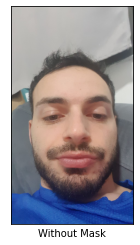

In [ ]:
from google.colab import files
uploaded = files.upload()

dst ='test.jpg' 
os.rename(list(uploaded.keys())[0], dst)

classification=None
img_pred = image.load_img(dst,target_size = (224, 224))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
p=load.predict(img_pred)
im = Image.open(dst)
plt.xticks([])
plt.yticks([])
plt.grid(False)
if (int(p[0][0]==0)):
 classification="Without Mask"
else:
  classification="With Mask"
plt.imshow(im,cmap=plt.cm.binary)
plt.xlabel(classification)
plt.show()

**This block is for printing the results of trained model only (not for loaded model).**

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
print(test_batches.class_indices)